In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import numpy as np 
import matplotlib.pyplot as plt 
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *
from ECD_control.ECD_tools.ECD_tools import *
import qutip as qt

In [123]:
#the parameters in our circuit, in CD language
epsilon = 1
betas_CD = np.array([-1j*epsilon, epsilon,0])
thetas_CD = np.array([np.pi/2.0, -np.pi/2.0, -np.pi/2.0])
phis_CD = np.array([np.pi/2.0, 0, np.pi/2.0])

print('betas:' + str(betas_CD))
print('phis:' + str(phis_CD))
print('thetas:' + str(thetas_CD))

betas:[0.-1.j 1.+0.j 0.+0.j]
phis:[1.57079633 0.         1.57079633]
thetas:[ 1.57079633 -1.57079633 -1.57079633]


In [124]:
psi0 = (qt.basis(2,0) + qt.basis(2,1)).unit()
sx0 = qt.expect(qt.sigmax(),psi0)
psi = (-1j*np.pi/4.0 * (qt.sigmay())).expm()*psi0
sz = qt.expect(qt.sigmaz(),psi)
print(sx0)
print(sz)

0.9999999999999998
-1.0


the circuit:
betas: [0.-1.j 1.+0.j 0.+0.j]
phis deg: [90.  0. 90.]
thetas deg: [ 90. -90. -90.]


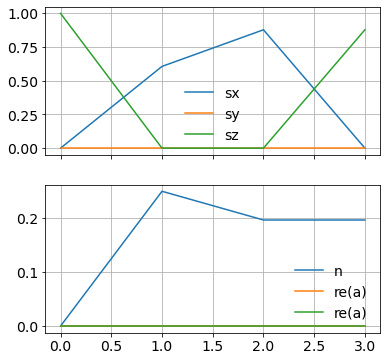

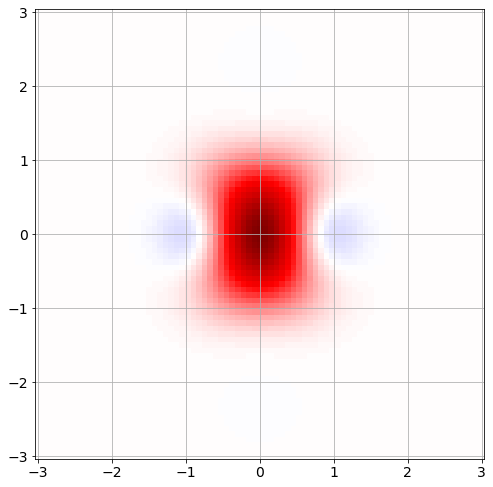

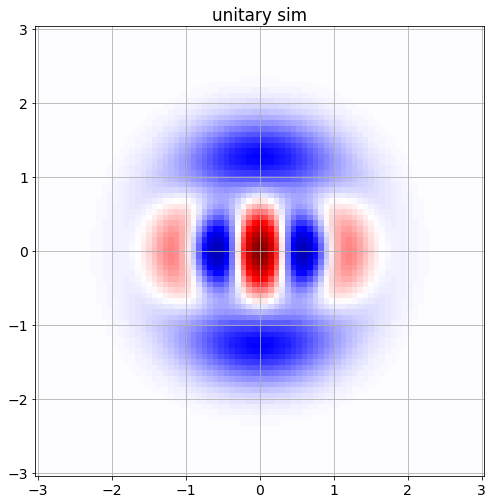

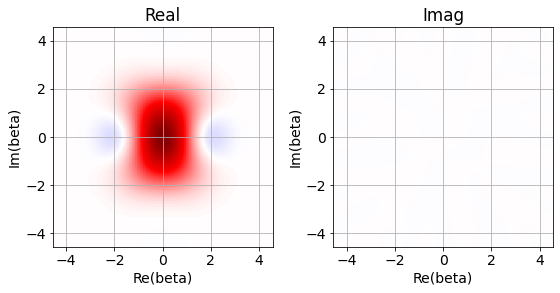

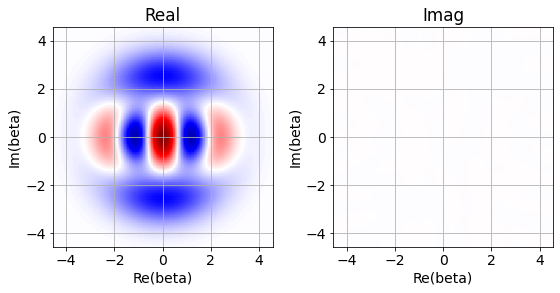

In [125]:
#Now, the unitary simulation with CD
print('the circuit:')
print('betas: ' + str(betas_CD))
print('phis deg: ' + str(180*phis_CD/np.pi))
print('thetas deg: ' + str(180*thetas_CD/np.pi))
N = 60
psi0 = qt.tensor(qt.basis(2,0),qt.basis(N,0))
#psit = qt.tensor(qt.basis(2,1),qt.basis(N,fock))
psis = unitary_circuit_sim_CD(psi0, betas_CD, phis_CD, thetas_CD, N)
psif = psis[-1]
plot_expect(psis)
g = qt.tensor(qt.basis(2,0), qt.identity(N))
e = qt.tensor(qt.basis(2,1), qt.identity(N))
psi_g = (g.dag()*psif).unit()
psi_e = (e.dag()*psif).unit()
xvec = np.linspace(-3,3,81)
plot_wigner(psi_g, xvec)
plot_wigner(psi_e, xvec, invert=True)
plt.title('unitary sim')
xvec_cf = 1.5*xvec
x,y = np.meshgrid(xvec_cf, xvec_cf)
betas_CF = x + 1j*y
cf_g = characteristic_function_tf(psi_g, betas_CF)
cf_e = characteristic_function_tf(psi_e, betas_CF)
plot_cf(xvec_cf, cf_g)
plot_cf(xvec_cf, cf_e)

In [138]:
#the parameters in our circuit, in ECD language
epsilon = 0.15
betas = np.array([-1j*epsilon, -epsilon,0])
thetas = np.array([np.pi/2.0, -np.pi/2.0,-np.pi/2.0])
phis = np.array([np.pi/2.0, 0,np.pi/2.0])

print('betas:' + str(betas))
print('phis:' + str(phis))
print('thetas:' + str(thetas))

betas:[ 0.  -0.15j -0.15+0.j    0.  +0.j  ]
phis:[1.57079633 0.         1.57079633]
thetas:[ 1.57079633 -1.57079633 -1.57079633]


the circuit:
betas: [ 0.  -0.15j -0.15+0.j    0.  +0.j  ]
phis deg: [90.  0. 90.]
thetas deg: [ 90. -90. -90.]


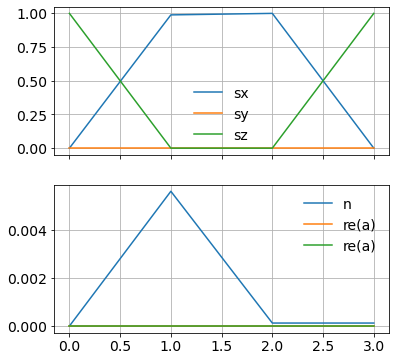

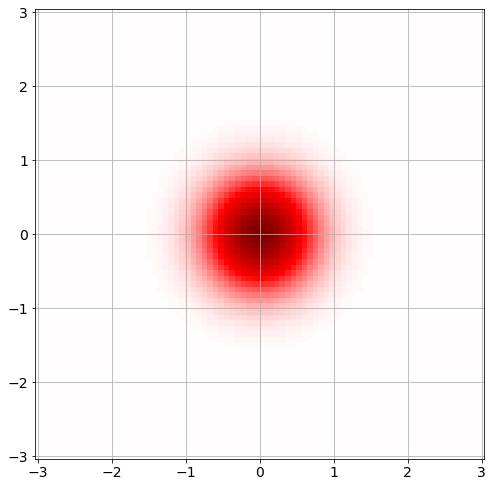

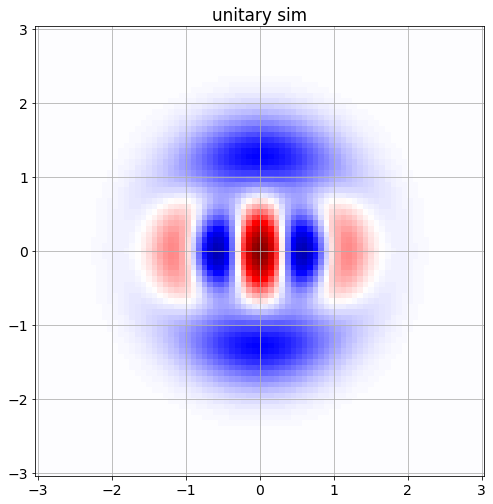

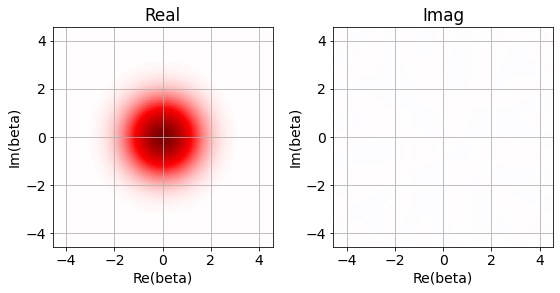

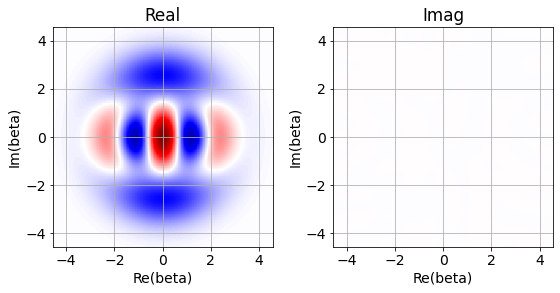

In [139]:
#Now, the unitary simulation with ECD
print('the circuit:')
print('betas: ' + str(betas))
print('phis deg: ' + str(180*phis/np.pi))
print('thetas deg: ' + str(180*thetas/np.pi))
N = 60
psi0 = qt.tensor(qt.basis(2,0),qt.basis(N,0))
#psit = qt.tensor(qt.basis(2,1),qt.basis(N,fock))
psis = unitary_circuit_sim_ECD(psi0, betas, phis, thetas, N)
psif = psis[-1]
plot_expect(psis)
g = qt.tensor(qt.basis(2,0), qt.identity(N))
e = qt.tensor(qt.basis(2,1), qt.identity(N))
psi_g = (g.dag()*psif).unit()
psi_e = (e.dag()*psif).unit()
xvec = np.linspace(-3,3,81)
plot_wigner(psi_g, xvec)
plot_wigner(psi_e, xvec, invert=True)
plt.title('unitary sim')
xvec_cf = 1.5*xvec
x,y = np.meshgrid(xvec_cf, xvec_cf)
betas_CF = x + 1j*y
cf_g = characteristic_function_tf(psi_g, betas_CF)
cf_e = characteristic_function_tf(psi_e, betas_CF)
plot_cf(xvec_cf, cf_g)
plot_cf(xvec_cf, cf_e)

In [137]:
#the parameters in our second circuit, in ECD language
betas2 = np.array([epsilon, 1j*epsilon])
thetas2 = np.array([np.pi/2.0, np.pi/2.0])
phis2 = np.array([np.pi/2.0, 0])

print('betas:' + str(betas))
print('phis:' + str(phis))
print('thetas:' + str(thetas))

betas:[ 0.-1.j -1.+0.j  0.+0.j]
phis:[1.57079633 0.         1.57079633]
thetas:[ 1.57079633 -1.57079633 -1.57079633]


the circuit:
betas: [1.+0.j 0.+1.j]
phis deg: [90.  0.]
thetas deg: [90. 90.]


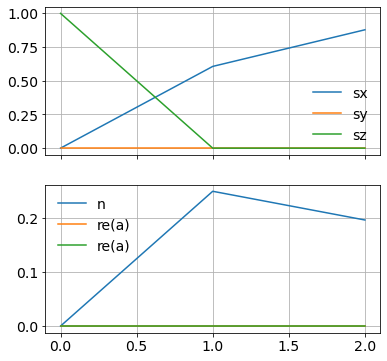

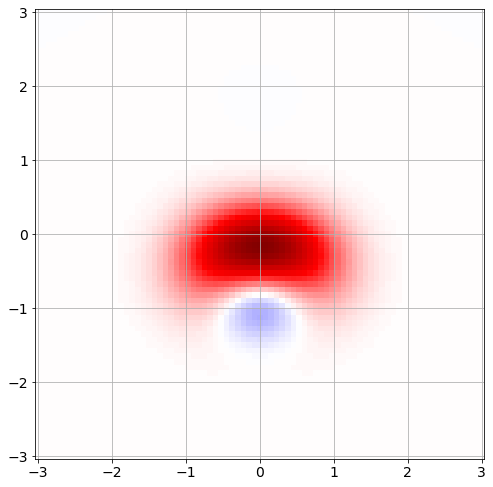

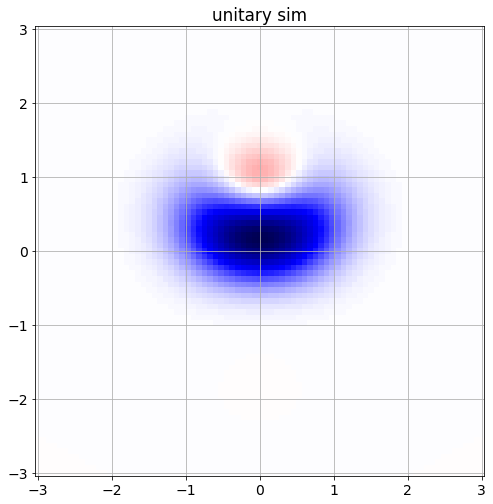

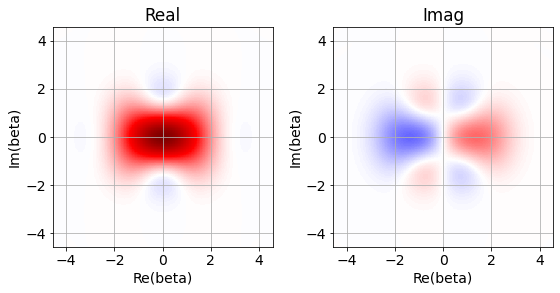

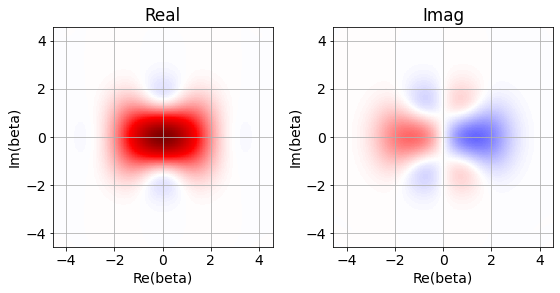

In [76]:
#Now, the unitary simulation with ECD
print('the circuit:')
print('betas: ' + str(betas2))
print('phis deg: ' + str(180*phis2/np.pi))
print('thetas deg: ' + str(180*thetas2/np.pi))
N = 40
psi0 = qt.tensor(qt.basis(2,0),qt.basis(N,0))
#psit = qt.tensor(qt.basis(2,1),qt.basis(N,fock))
psis = unitary_circuit_sim_ECD(psi0, betas2, phis2, thetas2, N)
psif = psis[-1]
plot_expect(psis)
g = qt.tensor(qt.basis(2,0), qt.identity(N))
e = qt.tensor(qt.basis(2,1), qt.identity(N))
psi_g = (g.dag()*psif).unit()
psi_e = (e.dag()*psif).unit()
xvec = np.linspace(-3,3,81)
plot_wigner(psi_g, xvec)
plot_wigner(psi_e, xvec, invert=True)
plt.title('unitary sim')
xvec_cf = 1.5*xvec
x,y = np.meshgrid(xvec_cf, xvec_cf)
betas_CF = x + 1j*y
cf_g = characteristic_function_tf(psi_g, betas_CF)
cf_e = characteristic_function_tf(psi_e, betas_CF)
plot_cf(xvec_cf, cf_g)
plot_cf(xvec_cf, cf_e)

In [81]:
#The ECD unitary
U_ECD = U_circuit_ECD(betas, phis, thetas, N)
U_CD = U_circuit_CD(betas_CD, phis_CD, thetas_CD, N)

In [83]:
U_ECD

Quantum object: dims = [[2, 60], [2, 60]], shape = (120, 120), type = oper, isherm = False
Qobj data =
[[-0.47363407-0.47363407j  0.37729488+0.37729488j -0.09933283-0.09933283j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [-0.0963392 -0.0963392j  -0.23681704-0.23681704j  0.40018165+0.40018165j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.09933283+0.09933283j -0.10218315-0.10218315j -0.05920426-0.05920426j
  ...  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 ...
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ... -0.21118305+0.21118305j  0.06528538-0.06528538j
   0.0231266 -0.0231266j ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ... -0.18479113+0.18479113j  0.32084926-0.32084926j
  -0.25120291+0.25120291j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  ... -0.0231266 +0.0231266j   0.0175402 -0.0175402j
  -0.01978328+0.01978328j]]

In [84]:
U_CD + U_ECD

Quantum object: dims = [[2, 60], [2, 60]], shape = (120, 120), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [85]:
#Our cavity and qubit. When using pulse construction on the FPGA, these objects can be loaded, and 
#the pre-calibrated values can be used. Here, we are making a "FakeCavity" and a "FakeQubit" in order
#to demonstrate the pulse construction when not connected to the FPGA_lib.

#The following parameters are assumed to be defined under your cavity and qubit entity object in FPGA lib.
storage_params = {'chi_kHz': -76.5, 'chi_prime_Hz': 0.02, 'Ks_Hz': -3.73, 'epsilon_m_MHz': 0, 'unit_amp': 8e-3, 'sigma': 11, 'chop': 4}
qubit_params = {'unit_amp': 0.684312, 'sigma': 12, 'chop': 4}

#calculating epsilon m
wave = storage_params['unit_amp']*gaussian_wave(storage_params['sigma'], storage_params['chop'])
epsilon_m = 1/np.trapz(wave)
epsilon_m_MHz = 1e3*epsilon_m/2/np.pi
print('epsilon_m_MHz: %.6f' % epsilon_m_MHz)
storage_params['epsilon_m_MHz'] = epsilon_m_MHz

pi = rotate(np.pi, phi=0, sigma=qubit_params['sigma'], chop=qubit_params['chop'], dt=1)
Omega_m = np.real(np.max(pi))/qubit_params['unit_amp']

#creating the "Fake storage" and "Fake qubit"
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The alpha used during the ECD gates.
alpha_CD = 10
#Buffer time between R and ECD pulses.
buffer_time = 0

epsilon_m_MHz: 864.568615


In [86]:
alpha_CD*storage_params['chi_kHz']

-765.0

In [87]:
#generating the conditional displacement circuit with all corrections.
cd_circuit_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,  buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=False, pad=True)
cavity_dac_pulse, qubit_dac_pulse, = cd_circuit_dict['cavity_dac_pulse'], cd_circuit_dict['qubit_dac_pulse']

C:\ProgramData\Miniconda3\envs\opt3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


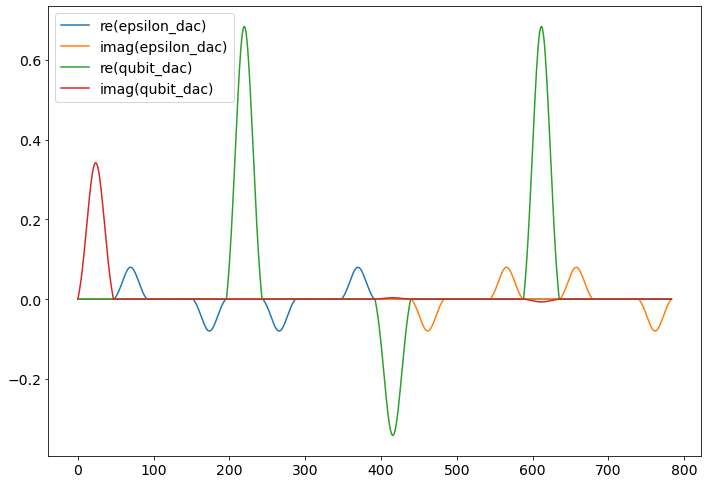

In [88]:
#plotting the pulse
plt.plot(np.real(cavity_dac_pulse), label='re(epsilon_dac)')
plt.plot(np.imag(cavity_dac_pulse), label='imag(epsilon_dac)')
plt.plot(np.real(qubit_dac_pulse), label='re(qubit_dac)')
plt.plot(np.imag(qubit_dac_pulse), label='imag(qubit_dac)')
plt.legend()

In [89]:
N = 60
N2 = 2
rho0 = qt.tensor(qt.basis(N2,0),qt.basis(N,0))
#rho0 = qt.tensor(qt.thermal_dm(N2, 0.05), qt.thermal_dm(N, 0.05))
chi = 2*np.pi*1e-6*storage_params['chi_kHz']
chi_prime = 2*np.pi*1e-9*storage_params['chi_prime_Hz']
Ks = 2*np.pi*1e-9*storage_params['Ks_Hz']
#delta_error = -2*np.pi*1e-9*5000
delta_error = 0
delta = -chi/2.0 + delta_error

#qubit_detune = 2*np.pi*1e-9*1e6
qubit_detune = 0
cavity_drive_scale = 1.0
qubit_drive_scale = 1.0
#vlad's anharmonicity
Kq = -2 * np.pi * 1e-3 * 2 * 200
kappa = 1/(1000.0e3)
gamma_down_qubit = 1/(110.0e3)
#I know this is not quite correct but let's try it
T2E = 100.0e3
gamma_2 = 1/T2E
gamma_phi_qubit = gamma_2 - gamma_down_qubit/2.0
#
#doing master equation simulation
epsilon = cavity_drive_scale*2*np.pi*1e-3*storage_params['epsilon_m_MHz']*cavity_dac_pulse
Omega = qubit_drive_scale*Omega_m*qubit_dac_pulse
me_options = {'Kq':Kq, 'delta':delta, 'chi':chi,
    'chi_prime':chi_prime, 'Ks':Ks, 'kappa':0, 'gamma_down_qubit':0,
    'gamma_phi_qubit':0, 'output':True, 'qubit_detune':qubit_detune}
result, alpha = simulate_master_equation(epsilon = 1j*epsilon,rho0=rho0,Omega=1j*Omega, **me_options)

Solving for alpha(t)
Constructing Hamiltonian
Running mesolve:
10.1%. Run time:   0.10s. Est. time left: 00:00:00:00
20.0%. Run time:   0.18s. Est. time left: 00:00:00:00
30.1%. Run time:   0.27s. Est. time left: 00:00:00:00
40.1%. Run time:   0.37s. Est. time left: 00:00:00:00
50.0%. Run time:   0.45s. Est. time left: 00:00:00:00
60.1%. Run time:   0.54s. Est. time left: 00:00:00:00
70.0%. Run time:   0.63s. Est. time left: 00:00:00:00
80.1%. Run time:   0.72s. Est. time left: 00:00:00:00
90.1%. Run time:   0.81s. Est. time left: 00:00:00:00
Total run time:   0.89s


In [90]:
rhof = qt.ket2dm(result.states[-1])
#rhof = result.states[-1]
g = qt.tensor(qt.basis(N2,0), qt.identity(N))
e = qt.tensor(qt.basis(N2,1), qt.identity(N))
rhof_g = (g.dag()*rhof*g).unit()
rhof_e = (e.dag()*rhof*e).unit()
#correct final frame
D =  qt.displace(N,alpha[-1])
rhof_g =D*rhof_g*D.dag()
rhof_e =D*rhof_e*D.dag()

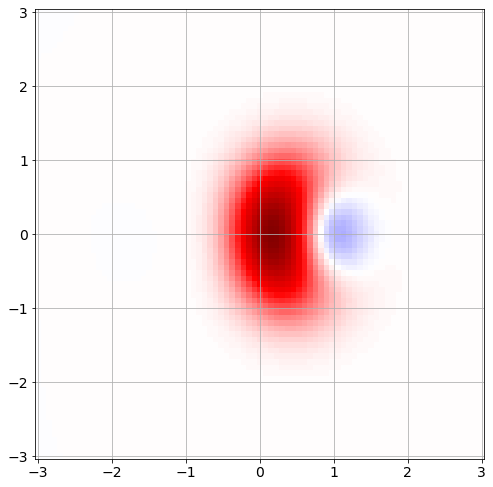

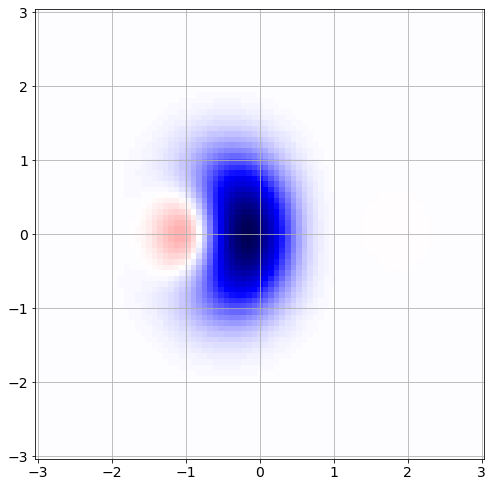

In [91]:
plot_wigner(rhof_g, xvec)
plot_wigner(-1*rhof_e, xvec)

In [93]:
fid_g = qt.fidelity(rhof_g, qt.ket2dm(psi_e))**2
fid_e = qt.fidelity(rhof_e, qt.ket2dm(psi_g))**2
print('fid g: %.6f fid e: %.6f' % (fid_g, fid_e))

fid g: 0.768548 fid e: 0.774497
